# 4.10 TASK PART 1

### Included here:
### Busiest Days of the week Bar chart
### Busiest Hours of Day Bar chart
### Times of day with Highest Spend
### Price Range Groupings
### Brand Loyalty

In [4]:
#importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# establishing a path
path = r'C:\Users\harkn\OneDrive\Desktop\Tasks\Data Immersion\Instacart Basket Analysis'

In [6]:
# importing dataframes
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10 filtered_profiled_data_avg.pkl'))

In [7]:
df.shape

(32401975, 35)

In [8]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'department', 'order_id', 'user_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_range_loc',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'spending_flag', 'order_frequency_flag', 'first_name',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependents',
       'family_status', 'income', 'region', 'age_group', 'income_group',
       'family_size'],
      dtype='object')

### Creating a bar chart for busiest days of the week

In [10]:
# Define a mapping from numerical values to day names
day_mapping = {0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'}

In [11]:
# Create the 'day_of_week' column using the mapping
df['day_of_week'] = df['orders_day_of_week'].map(day_mapping)

In [12]:
df[['orders_day_of_week', 'day_of_week']].head()

,orders_day_of_week,day_of_week
0,6,Friday
1,6,Friday
2,0,Saturday
3,3,Tuesday
4,4,Wednesday


Text(0.5, 1.0, 'Busiest Days of the Week')

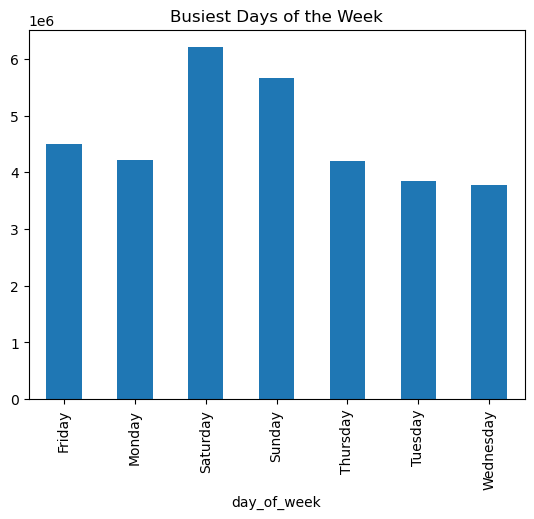

In [13]:
#indexing by hour of day and adding title
bar_day_of_week = df['day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Busiest Days of the Week')

In [14]:
#saving image
bar_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_day_of_week.png'))

### Creating a bar chart for busiest hour of the day

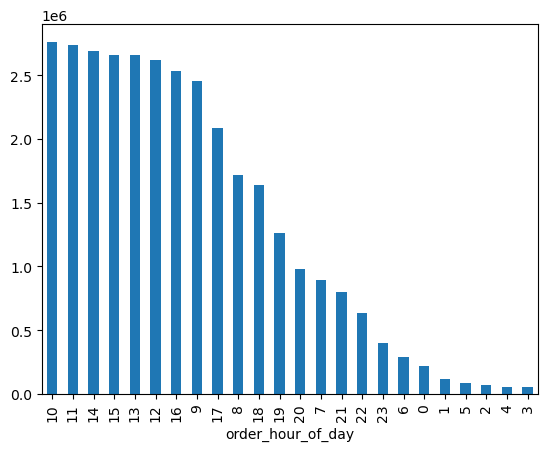

In [16]:
#plotting bar chart
bar_busiest_times_of_day = df['order_hour_of_day'].value_counts().plot.bar()

In [17]:
#saving image
bar_busiest_times_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_busiest_times_of_day.png'))

### Busiest hours of the day

Text(0.5, 1.0, 'Busiest Hours of the Day')

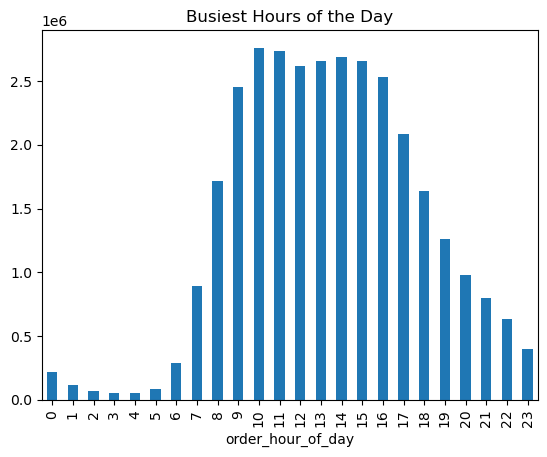

In [19]:
#indexing by hour of day
bar_hour_of_day = df['order_hour_of_day'].value_counts().sort_index().plot.bar()
plt.title('Busiest Hours of the Day')

In [20]:
#saving image
bar_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_hour_of_day.png'))

### Price Range Groupings

In [22]:
# Round the 'prices' column to the nearest dollar
df['prices_rounded'] = df['prices'].round()

In [23]:
# Count the occurrences of each dollar value
price_counts = df['prices_rounded'].value_counts().sort_index()
print(price_counts)

prices_rounded
1.0     1431908
2.0     2481928
3.0     1987521
4.0     3120970
5.0     2070159
6.0     2750694
7.0     2544451
8.0     2448233
9.0     2055854
10.0    2181147
11.0    1733355
12.0    2402055
13.0    1733801
14.0    2180582
15.0     873253
16.0      24496
17.0      32176
18.0      33163
19.0      42523
20.0      51772
21.0      51259
22.0      43450
23.0      39776
24.0      53119
25.0      29204
Name: count, dtype: int64


In [24]:
# Define the bin edges
bins = [0, 5, 10, 15, 20, 30]
bin_labels = ['$0-5', '$5-10', '$10-15', '$15-20', '$20+']

In [25]:
# Assign each price to a bin
df['price_bins'] = pd.cut(df['prices_rounded'], bins=bins, labels=bin_labels, include_lowest=True)

In [26]:
# Count occurrences within each bin
price_bin_counts = df['price_bins'].value_counts().sort_index()
print(price_bin_counts)

price_bins
$0-5      11092486
$5-10     11980379
$10-15     8923046
$15-20      184130
$20+        216808
Name: count, dtype: int64


In [27]:
# Plot the distribution of prices across bins
plt.figure(figsize=(10, 6))
price_bin_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Prices by Bins')
plt.xlabel('Price Bins')
plt.ylabel('Count of Orders')
plt.xticks(rotation=0)
# Save the plot as a PNG file
price_bins_plot_path = os.path.join(path, '04 Analysis', 'Visualizations', 'price_bins_distribution.png')
plt.savefig(price_bins_plot_path, bbox_inches='tight')
plt.close()

In [28]:
# Save the plot as a PNG file
price_bins_plot_path = os.path.join(path, '04 Analysis', 'Visualizations', 'price_bins_distribution.png')
plt.savefig(price_bins_plot_path, bbox_inches='tight')
plt.close()

### Pie chart for price bins

In [30]:
#round to nearest dollar, value count, price bins

In [31]:
df['prices'].describe()

count    3.239685e+07
mean     7.791044e+00
std      4.088546e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [32]:
# Round the prices to the nearest dollar
df['rounded_prices'] = df['prices'].round()

In [33]:
# Get value counts of the rounded prices
df['rounded_prices'].value_counts().sort_index()

rounded_prices
1.0     1431908
2.0     2481928
3.0     1987521
4.0     3120970
5.0     2070159
6.0     2750694
7.0     2544451
8.0     2448233
9.0     2055854
10.0    2181147
11.0    1733355
12.0    2402055
13.0    1733801
14.0    2180582
15.0     873253
16.0      24496
17.0      32176
18.0      33163
19.0      42523
20.0      51772
21.0      51259
22.0      43450
23.0      39776
24.0      53119
25.0      29204
Name: count, dtype: int64

In [34]:
# Define bins and labels
bins = [1, 6, 12, 18, 25]
labels = ['Low - $1-6', 'Medium - $6-12', 'High - $12-18', 'Very High - $18-25']

In [35]:
# Create the 'price_group' column by binning the rounded prices
df['price_group'] = pd.cut(df['rounded_prices'], bins=bins, labels=labels, include_lowest=True)

In [36]:
# Count the values in each price group
df['price_group'].value_counts()

price_group
Low - $1-6            13843180
Medium - $6-12        13365095
High - $12-18          4877471
Very High - $18-25      311103
Name: count, dtype: int64

In [37]:
# Create a pie chart
plt.figure(figsize=(8, 8))
price_group_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
# Add title and show the plot
plt.title('Distribution of Prices by Price Group')
plt.ylabel('')  # Hide the y-label
# Save the plot as a PNG file
price_group_pie = os.path.join(path, '04 Analysis', 'Visualizations', 'price_group_pie.png')
plt.savefig(price_bins_plot_path, bbox_inches='tight')
plt.show()

NameError: name 'price_group_counts' is not defined

<Figure size 800x800 with 0 Axes>

### Top 5 products

In [ ]:
# Find the Top 5 Products Overall
top_5_products = df['product_name'].value_counts().head(5)

In [ ]:
# Step 2: Identify Customer Groups for Each Top Product
customer_groups = df[df['product_name'].isin(top_5_products.index)].groupby(['product_name', 'age_group', 'income_group', 'region']).size().unstack(fill_value=0)

In [ ]:
# Step 3: Plotting Customer Groups for Top 5 Products
for product in top_5_products.index:
    customer_group_distribution = customer_groups.loc[product]
    customer_group_distribution.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Customer Groups for {product}')
    plt.xlabel('Customer Group')
    plt.ylabel('Number of Orders')
    plt.xticks(rotation=45)

In [ ]:
top_5_products

### Top 5 by total sales

In [ ]:
# Group by 'product_name' and sum up the 'prices' to get the total price amount for each product
top_products = df.groupby('product_name')['prices'].sum()

In [ ]:
# Sort the products by total price amount in descending order and select the top 5
top_products.sort_values(ascending=False).head(5)

### Brand Loyalty (Frequency of Use)

In [ ]:
#count the frequency of each unique value in 'days_since_prior_order'
frequency_counts = df['days_since_prior_order'].value_counts().sort_index()

In [ ]:
# Create a bar chart for user frequency
plt.figure(figsize=(10, 6))
plt.bar(frequency_counts.index, frequency_counts, color='skyblue')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Frequency')
plt.title('How Often is the Gap Between Orders')
plt.grid(axis='y')
#exporting and saving image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_frequency_counts.png'))

In [38]:
df['family_status'].value_counts()

family_status
married                             22754753
single                               5325187
divorced/widowed                     2771562
living with parents and siblings     1550473
Name: count, dtype: int64